# Chp. 1 Optimal Parameters
Justin Bois, Ph.D.

Outcomes of measurements follow probability distributions
- defined by the story of how the data came to be

Michaelson's speed of light
- assumed results were normally distributed
    - verified by looking at the PDF
    - and the CDF
        -more effective because there is no binning bias

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
sns.set()

In [5]:
# read in the michelson data
michelson_speed_of_light = pd.read_csv('morley.csv', index_col=0)
michelson_speed_of_light.head()

#Several Experiments, each with 20 "runs" and the corresponding measurement

Expt  Run  Speed
1     1    1    850
2     1    2    740
3     1    3    900
4     1    4   1070
5     1    5    930

Description

A classical data of Michelson (but not this one with Morley) on measurements done in 1879 on the speed of light. The data consists of five experiments, each consisting of 20 consecutive ‚Äòruns‚Äô. The response is the speed of light measurement, suitably coded (km/sec, with 299000 subtracted).

https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/morley.html, consulted, 5/29/18, 3:19 pm, CST

In [6]:
michelson_speed_of_light.Speed = (michelson_speed_of_light.Speed+299000)
michelson_speed_of_light.head()

Expt  Run   Speed
1     1    1  299850
2     1    2  299740
3     1    3  299900
4     1    4  300070
5     1    5  299930

In [7]:
michelson_speed_of_light.describe()

Expt         Run          Speed
count  100.000000  100.000000     100.000000
mean     3.000000   10.500000  299852.400000
std      1.421338    5.795331      79.010548
min      1.000000    1.000000  299620.000000
25%      2.000000    5.750000  299807.500000
50%      3.000000   10.500000  299850.000000
75%      4.000000   15.250000  299892.500000
max      5.000000   20.000000  300070.000000

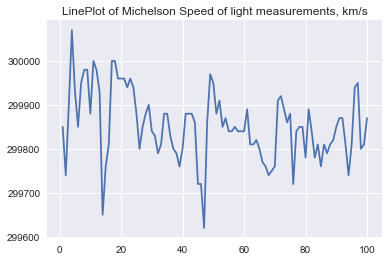

In [8]:
michelson_speed_of_light.Speed.plot(marker = 'x')
plt.title('LinePlot of Michelson Speed of light measurements, km/s')
plt.show()

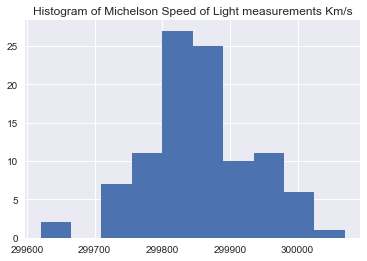

In [9]:
michelson_speed_of_light.Speed.hist()
plt.title('Histogram of Michelson Speed of Light measurements Km/s')
plt.show()

In [10]:
def ecdf(data):
    '''Compute (ECDF) 
    Empirical Cumulative Distribution Function 
    for a one-dimensional array of measurements.'''
    # number of data points
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n #just scaling y ticks from 0-1
    
    return x, y

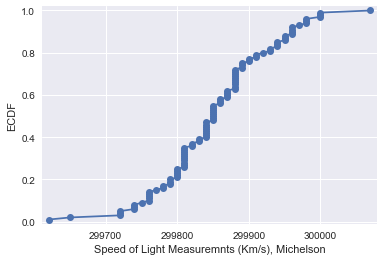

In [11]:
# Compute the ECDF for the county level dem_share of swing states
x, y = ecdf(michelson_speed_of_light.Speed)

# Generate plot
_ = plt.plot(x, y, #linestyle = 'none',
            #alpha = 0.5, markeredgecolor = 'w' ,
            #markeredgewidth = .8,
            marker = 'o')

# set margins
plt.margins(0.02)

# label the axes
_ = plt.xlabel('Speed of Light Measuremnts (Km/s), Michelson')
_ = plt.ylabel('ECDF')

plt.show()

## Checking Normality of Michelson data

In [12]:
#compute mu and sigma of data
mean = np.mean(michelson_speed_of_light.Speed)
std = np.std(michelson_speed_of_light.Speed)

# generate some normally distributed samples with mu and sigma
# THEORETICAL CDF
samples = np.random.normal(mean, std, size = 10000)

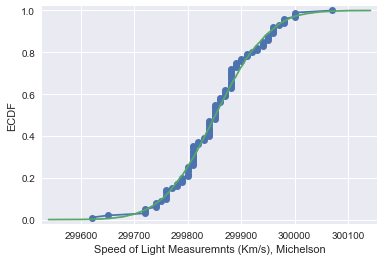

In [13]:
# Overlay the plots to see if the empirical and theoretical distributions align

# plot the epirical data
x, y = ecdf(michelson_speed_of_light.Speed)
_ = plt.plot(x, y, #linestyle = 'none',
            #alpha = 0.5, markeredgecolor = 'w' ,
            #markeredgewidth = .8,
            marker = 'o')
# plot the theoretical data
x, y = ecdf(samples)
_ = plt.plot(x, y, 
            marker = 'x')

# set margins
plt.margins(0.02)

# label the axes
_ = plt.xlabel('Speed of Light Measuremnts (Km/s), Michelson')
_ = plt.ylabel('ECDF')

plt.show()
# the units of the x axis are off, but this is just an excercise, so don't sweat it for now.

## CDF with bad estimate of st. dev. off by 50%

In [14]:
#compute mu and BAD-SIGMA of data
mean = np.mean(michelson_speed_of_light.Speed)
std = np.std(michelson_speed_of_light.Speed)*(1.5)

# generate some normally distributed samples with mu and sigma
# THEORETICAL CDF
samples = np.random.normal(mean, std, size = 10000)

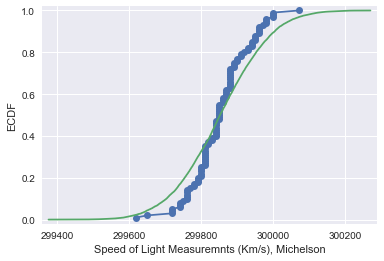

In [15]:
# Overlay the plots to see if the empirical and theoretical distributions align

# plot the epirical data
x, y = ecdf(michelson_speed_of_light.Speed)
_ = plt.plot(x, y, #linestyle = 'none',
            #alpha = 0.5, markeredgecolor = 'w' ,
            #markeredgewidth = .8,
            marker = 'o')
# plot the theoretical data
x, y = ecdf(samples)
_ = plt.plot(x, y, 
            marker = 'x')

# set margins
plt.margins(0.02)

# label the axes
_ = plt.xlabel('Speed of Light Measuremnts (Km/s), Michelson')
_ = plt.ylabel('ECDF')

plt.show()
# the units of the x axis are off, but this is just an excercise, so don't sweat it for now.

## CDF with bad estimate of mean off by just .01%

In [16]:
#compute mu at 99.9999% and normal sigma
mean = np.mean(michelson_speed_of_light.Speed)*(1.0001)
std = np.std(michelson_speed_of_light.Speed)

# generate some normally distributed samples with mu and sigma
# THEORETICAL CDF
samples = np.random.normal(mean, std, size = 10000)

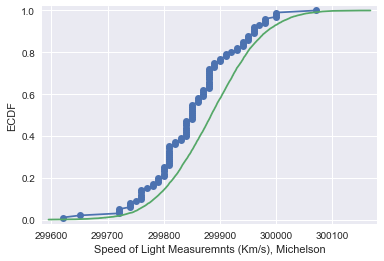

In [17]:
# Overlay the plots to see if the empirical and theoretical distributions align

# plot the epirical data
x, y = ecdf(michelson_speed_of_light.Speed)
_ = plt.plot(x, y, #linestyle = 'none',
            #alpha = 0.5, markeredgecolor = 'w' ,
            #markeredgewidth = .8,
            marker = 'o')
# plot the theoretical data
x, y = ecdf(samples)
_ = plt.plot(x, y, 
            marker = 'x')

# set margins
plt.margins(0.02)

# label the axes
_ = plt.xlabel('Speed of Light Measuremnts (Km/s), Michelson')
_ = plt.ylabel('ECDF')

plt.show()


## Optimal parameters
- Parameter values that bring the model in closes agreement with the data
- the parameters computed from the data

**But! Optimal parameters with a bad model will still give bad results**

### Packages to do statistical inference
- scipy.stats
- statsmodels
- hacker stats with numpy

## Example: Baseball No-hitters and Poisson process
*Recall: Time between Poisson events is exponentially distribuyted*

- The exponential distribution has a single parameter
    - **tau** : typical interval time.
    - tau for optimal fit = mean interval time where time is in units of number of games between no-hitters

In [18]:
no_hitter_times = [ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467]
no_hitter_times = np.array(no_hitter_times)
type(no_hitter_times)

numpy.ndarray

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


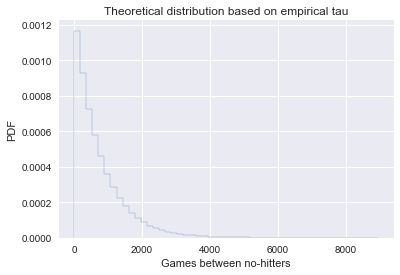

In [19]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(no_hitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')
_ = plt.title('Theoretical distribution based on empirical tau')

# Show the plot
plt.show()


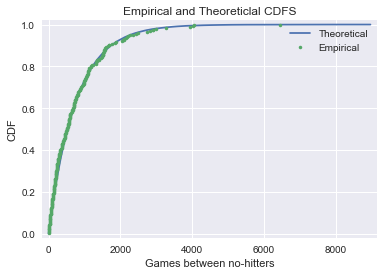

In [106]:
# Create an ECDF from real data: x, y
x, y = ecdf(no_hitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

plt.title('Empirical and Theoreticlal CDFS')
plt.legend(['Theoretical', 'Empirical'])

# Show the plot
plt.show()


### fudge tau to see the effect

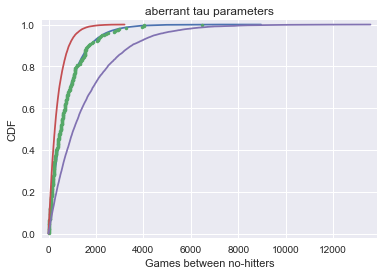

In [21]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.title('aberrant tau parameters')
plt.show()

## Linear regression by least squares
Recall the Pearson Correlation Coefficient
- often time a linear function is appropriate
- parameters:
    - slope
    - intercept

**Optimizing the parameters**
- residual is the delta y between a data point and the regression line

Leas squares with `np.polyfit()`
- computational algorithm to do the number crunching for us


In [22]:
#slope, intercept = np.polyfit(total_votes, dem_share, 1)#1 for degree

In [23]:
illiteracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])
fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

In [24]:
#Computing the Pearson correlation coefficient
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between 
    two arrayws."""
    # Compute correlation matrix : corr_mat
    corr_mat = np.corrcoef(x, y)
    # Return entry [0,1]
    return corr_mat[0,1]

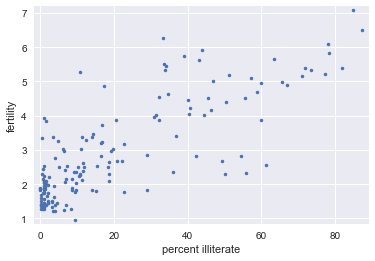

0.8041324026815341


In [25]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


Assume fertility is a linear function of the female literacy rate. That is , f = ai + b

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


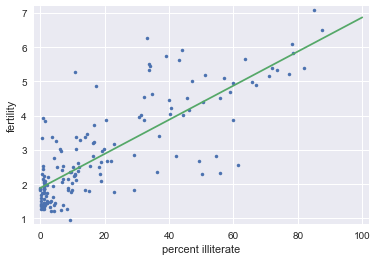

In [26]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1) #degree 1 "polynomial"

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


### Plotting the function that is being optimized
The RSS, versus the slope parameter a

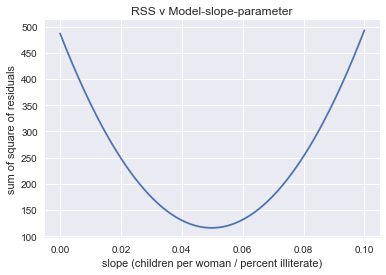

In [27]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.title('RSS v Model-slope-parameter')
plt.show()

#note that the sum of squared residuals is minimized around 0.05

## The importance of EDA: Anscombe's quartet
They all have the same:
- mean x
- mean y
- linear regression
- sum sq residuals

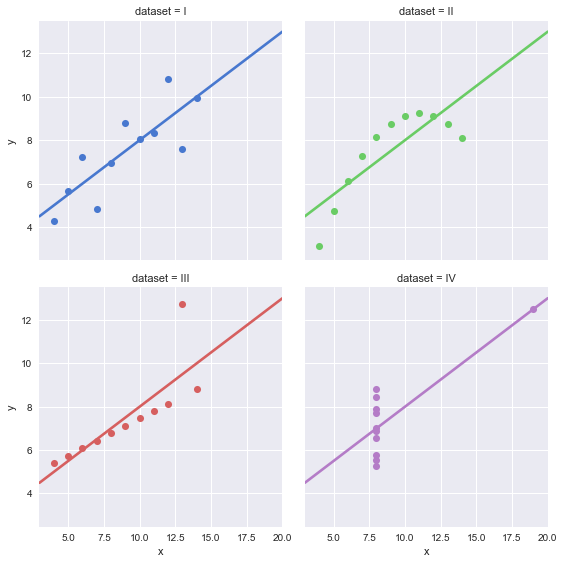

In [28]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

In [29]:
df.head()

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
dataset    44 non-null object
x          44 non-null float64
y          44 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [31]:
df.describe()

x          y
count  44.000000  44.000000
mean    9.000000   7.500682
std     3.198837   1.958925
min     4.000000   3.100000
25%     7.000000   6.117500
50%     8.000000   7.520000
75%    11.000000   8.747500
max    19.000000  12.740000

0.5000909090909095 3.0000909090909076


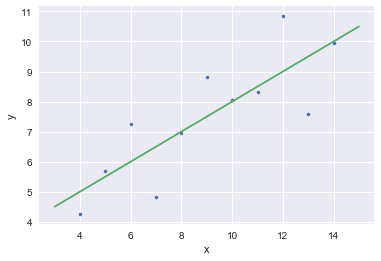

In [32]:
# Perform linear regression: a, b
a, b = np.polyfit(df[df.dataset == 'I'].x, df[df.dataset == 'I'].y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(df[df.dataset == 'I'].x, df[df.dataset == 'I'].y,
             marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


In [33]:
x1 = df[df.dataset == 'I'][['x', 'y']]
x2 = df[df.dataset == 'II'][['x', 'y']]
#x3 = 

In [34]:
# iterate through the datasets
for ds in set(df.dataset):
    # Perform linear regression: a, b
    a, b = np.polyfit(df[df.dataset == ds].x, df[df.dataset == ds].y, 1)

    # Print the result
    print('modeled parameters of dataset:', ds)
    print('slope:', a, 'intercept:', b)
    print('')

modeled parameters of dataset: IV
slope: 0.49990909090909064 intercept: 3.0017272727272735

modeled parameters of dataset: III
slope: 0.4997272727272731 intercept: 3.0024545454545453

modeled parameters of dataset: I
slope: 0.5000909090909095 intercept: 3.0000909090909076

modeled parameters of dataset: II
slope: 0.5000000000000004 intercept: 3.000909090909089



# Chp. 2 Generating bootstrap replicates

Thinking probabilistically
- generalizeability of results
- repeating an experiment may not be possible
*But!* We can simulate getting the data again.
- resample the data we have
- recompute the summary statistic of interest (i.e. the mean)
    - randomly select one measurement
    - randomly select n measurements and store them
        - now we have a resampled array of data
        - compute the summary statistic on the sample and store the result
        - iterate the sampling process repeatedly to simulate getting a new set of measurements
        
## Bootstraping
- use of resampled data to perform statistical inference
- each resampled array of the data is a **bootstrap sample**
    - a boostrap replicate summary statistic is computed from the bootstrap sample
        - note that the max number of unique bootstrap samples possible is n^n (since repeted values ara "allowed") and the max mean = max of the original array. 
            - (in the edge case where you have n repetitions of n.max()
    
Let's try it with the michelson data


In [35]:
# random choice snippet
np.random.choice([1,2,3,4,5], size = 3)

array([4, 5, 4])

In [36]:
michelson_speed_of_light.Speed.describe()

count       100.000000
mean     299852.400000
std          79.010548
min      299620.000000
25%      299807.500000
50%      299850.000000
75%      299892.500000
max      300070.000000
Name: Speed, dtype: float64

In [37]:
# bootstrap samples from michelson data
bs_sample = np.random.choice(michelson_speed_of_light.Speed, size = 100)

In [38]:
np.mean(bs_sample)

299857.6

In [39]:
np.median(bs_sample)

299860.0

In [40]:
np.std(bs_sample)

76.17243595947289

In [41]:
# data camp array for set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015
rainfall = [ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ]
print(len(rainfall))

133


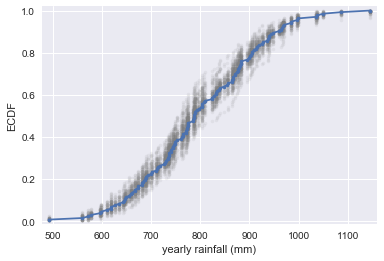

In [42]:
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()


## Bootstrap confidence intervals

In [43]:
# bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    '''Generate bootstrap replicate of one-dimensional data.'''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) #return the statistic of interest on the bootstraped replicate

In [44]:
bootstrap_replicate_1d(michelson_speed_of_light.Speed, np.mean)

299859.1

## Many bootstrap replicates

In [45]:
# we'll make 10,000 bootstrap replicates

# initialize empty array
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(michelson_speed_of_light.Speed, np.mean)

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


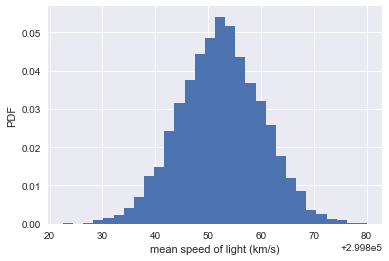

In [46]:
plt.hist(bs_replicates, bins = 30, normed = True) #normed = True sets the height so that the total area of the bars is = 1
# we do it so the histogram approximates a probability density function
# area under the curve being the probability of such a pdf

plt.xlabel('mean speed of light (km/s)')
plt.ylabel('PDF')
plt.show()

We have computed the aprox PDF of the mean speed of light we would expect to get if we performed the measurements again.
Now we're thingking probabilistically
- if we repeated the experiments we would expect to see the mean only vary by the std

### Confidence interval of a statistic
- if we repeated measurements over and over again, *p%* of the observed values would lie within the *p%* confidence interval. 
    - in our case, 95% of the means would lie within the 95% confidence interval
    - by doing bootstrap replicates we just *repeated* the experiment over and over again

In [47]:
conf_int = np.percentile(bs_replicates, [2.4, 97.5])
# 2.5th and 97.5th percentiles to get the 95th confidence interval
    # this means the model is 95% confident the mean is within the range of the two values generated in the array

In [48]:
conf_int

array([299837.0976, 299867.5   ])

#### Generating many bootstrap replicates

In [49]:
def draw_bs_reps(data, func, size = 1):
    '''Draw bootstrap replicates.'''
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    
    #generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

### Bootstrap replicates of the mean and the SEM
- compute the bootstrap estimate of the probability distribution function of the mean
    - remember, we are estimating the mean we would get if the measurements from the original dataset coul be repeated. 
    - This is a *probabilistic* estimate of the mean. 
    - We will plot the PDF as a histogram, 
    **notice** that it will be normal
    
In fact, it can be shown that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.)

The standard deviation of this distribution, called the **standard error of the mean** or **SEM**, is given by the standard deviation of the data divided by the square root of the number of data points. I.e. for a data set, `sem = np.std(data)/np.sqrt(len(data))`

Using hacker statisticks, we get the same result without the need to derive it, 

In [50]:
# take 10,000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)
bs_replicates

array([821.52030075, 787.84661654, 808.19323308, ..., 804.00902256,
       804.07593985, 816.67142857])

In [51]:
# comptue and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

10.510549150506188
10.450100751391789


/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


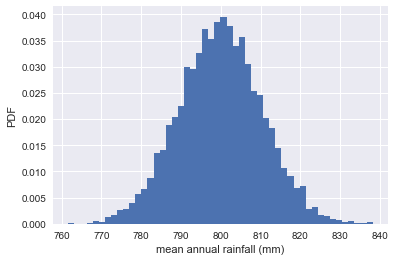

In [52]:
# make a histogram of the results
plt.hist(bs_replicates, bins = 50, normed = True)
plt.xlabel('mean annual rainfall (mm)')
plt.ylabel('PDF')
plt.show()

In [53]:
#confidence interval 95%
np.percentile(bs_replicates, [2.5, 97.5])

array([779.39796992, 820.38620301])

### Bootstrap replicates of other statistics


/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


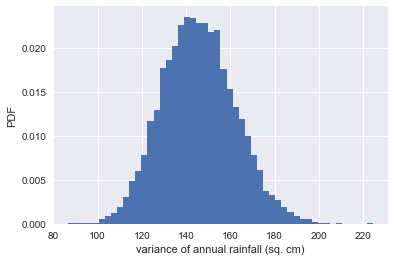

In [54]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# not normally distributed, as it has a longer tail to the right

## Pairs bootstrap
### Nonparametric inference
- make no assumptions about the model or probability distribution underlying the data
- OLS used a linnear model with 2 parameters
    - the optimal values computed would be different if they were computed with different data

### Pairs bootstrap for linear regression
- resample data *in pairs*
- boostrap sampel consists of a set of (x,y) pairs
- Each slope and intercept is a bootstrap replicate
- Compute confidence intervals from percentiles of bootstrap replicates

### Generating a pairs bootstrap sample
- sample the indices of the data with replacement

In [55]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [56]:
df_swing = pd.read_csv('https://raw.githubusercontent.com/johnashu/datacamp/master/statistical-thinking-in-python-part-1/2008_swing_states.csv')
df_swing.head()

state           county  total_votes  dem_votes  rep_votes  dem_share
0    PA      Erie County       127691      75775      50351      60.08
1    PA  Bradford County        25787      10306      15057      40.64
2    PA     Tioga County        17984       6390      11326      36.07
3    PA    McKean County        15947       6465       9224      41.21
4    PA    Potter County         7507       2300       5109      31.04

In [57]:
inds = np.arange(len(df_swing.total_votes))

bs_inds = np.random.choice(inds, len(inds))

bs_total_votes = df_swing.total_votes[bs_inds]
bs_dem_share = df_swing.dem_share[bs_inds]

bs_slope, bs_intercept = np.polyfit(bs_total_votes, bs_dem_share, 1)

print(bs_slope, bs_intercept)

np.polyfit(df_swing.total_votes, df_swing.dem_share, 1) # fit of original

4.171176804410486e-05 39.50250989371809


array([4.0370717e-05, 4.0113912e+01])

We can even plot all of these bootstrapped regression lines to see how the regression line might have changed if the data were "collected again."

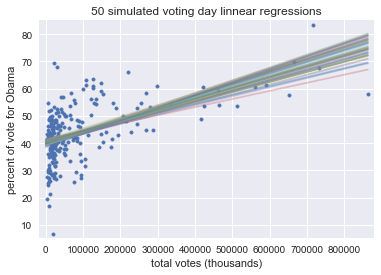

In [58]:
# Plot the illiteracy rate versus fertility
_ = plt.scatter(df_swing.total_votes, df_swing.dem_share, marker='.')#, linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

for i in range (50):
    # Perform a linear regression using np.polyfit(): a, b
    inds = np.arange(len(df_swing.total_votes))
    
    bs_inds = np.random.choice(inds, len(inds))
    
    bs_total_votes = df_swing.total_votes[bs_inds]
    bs_dem_share = df_swing.dem_share[bs_inds]
    
    bs_slope, bs_intercept = np.polyfit(bs_total_votes, bs_dem_share, 1)
    # Make theoretical line to plot
    x = np.array([0, np.max(df_swing.total_votes)])
    y = bs_slope * x + bs_intercept
    
    # Add regression line to your plot
    _ = plt.plot(x, y, alpha = 0.3)

# Draw the plot
plt.title('50 simulated voting day linnear regressions')
plt.show()

In [59]:
### A Function to do pairs bootstraps
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

### Pairs boostrap of literacy/ferticlity data

[0.04427267 0.05523953]


/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


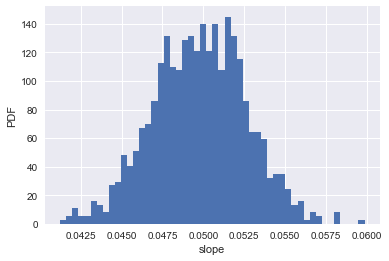

In [60]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

### Plotting bootstrap regressions
- visualize the variability "we might expect" in a linnera regression by plotting the line we would get from each bootstrap replicate of the slope and intercept. 
    - done for 100 boostrap replicates

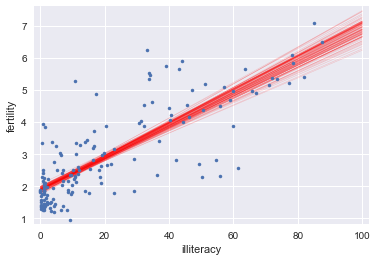

In [61]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# Chp. 3 Formulating and simulating a hypothesis
How do we assess how reasonable our data described by the model is?
**Hypothesis testing**
- hypothesizing county level data distributions in similar states
- assessment of how "reasonable the observed data are assuming a hypothesis is true"

The hypothesis we're testing is the "null hypothesis"

- could just plot the ECDFS of the two counties
    - pensilvania
    - ohio
- but this visalization is does not make it easy to determine. 
    - PA lloks slightly more toward Obama in the middle part of the ECDFS but not by much

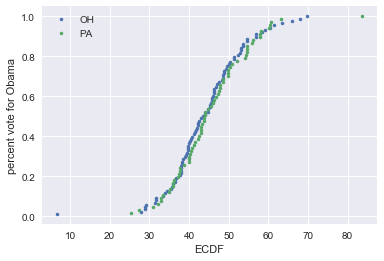

In [62]:
x,y = ecdf(df_swing.dem_share[df_swing.state == 'OH'])
plt.plot(x,y, marker = '.', linestyle = 'None')

x,y = ecdf(df_swing.dem_share[df_swing.state == 'PA'])
plt.plot(x,y, marker = '.', linestyle = 'None')
plt.legend(['OH', 'PA'])
plt.xlabel('ECDF')
plt.ylabel('percent vote for Obama')
plt.show()


We could compare some summary statistics but that doesn't help much either. Since the summary statistics are so similar. 

In [63]:
print('------ PA')
print('mean', round(df_swing.dem_share[df_swing.state == 'PA'].mean(), 2), '%')
print('median', round(df_swing.dem_share[df_swing.state == 'PA'].median(), 2), '%')
print('std', round(df_swing.dem_share[df_swing.state == 'PA'].std(), 2), '%')

------ PA
mean 45.48 %
median 44.03 %
std 9.8 %


In [64]:
print('------ OH')
print('mean', round(df_swing.dem_share[df_swing.state == 'OH'].mean(), 2), '%')
print('median', round(df_swing.dem_share[df_swing.state == 'OH'].median(), 2), '%')
print('std', round(df_swing.dem_share[df_swing.state == 'OH'].std(), 2), '%')

------ OH
mean 44.32 %
median 43.67 %
std 9.9 %


In [65]:
print('------ PA - OH difference')
print('mean', round(df_swing.dem_share[df_swing.state == 'PA'].mean() - df_swing.dem_share[df_swing.state == 'OH'].mean(), 2), '%')
print('median', round(df_swing.dem_share[df_swing.state == 'PA'].median() - df_swing.dem_share[df_swing.state == 'OH'].median(), 2), '%')
print('std', round(df_swing.dem_share[df_swing.state == 'PA'].std() - df_swing.dem_share[df_swing.state == 'OH'].std(), 2), '%')

------ PA - OH difference
mean 1.16 %
median 0.36 %
std -0.09 %


To resolve this issue, simulate what the data "would" look like if the county-level voting trends in the two states were identically distributed. 

## Simulating the Hypothesis
- We can do this by putting the dem share of the vote for both states together.
    - 67 for PA, the other 88 for OH
- We then shuffle them, and assign the first 67 to PA and the rest to OH
    - We just "redid" the election as if there were no difference between PA and OH

This technique is called **permutation** 
- random reordering of entries in an array

## Generating a permutation sample

In [66]:
dem_share_PA = df_swing.dem_share[df_swing.state == 'PA']
dem_share_OH = df_swing.dem_share[df_swing.state == 'OH']

#concatenate the two arrayws
dem_share_both = np.concatenate([dem_share_PA, dem_share_OH])

# "shuffle" the values
dem_share_perm = np.random.permutation(dem_share_both)

# assign the appropriately lengthed subsets to each permuted state
# permutation samples
perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

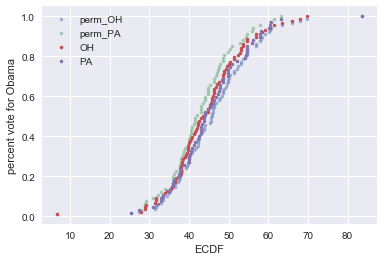

In [67]:
# compare the ECDFS of the permuted samples
x,y = ecdf(perm_sample_OH)
plt.plot(x,y, marker = '.', linestyle = 'None', alpha = .5)

x,y = ecdf(perm_sample_PA)
plt.plot(x,y, marker = '.', linestyle = 'None', alpha = .5)

x,y = ecdf(df_swing.dem_share[df_swing.state == 'OH'])
plt.plot(x,y, marker = '.', linestyle = 'None')

x,y = ecdf(df_swing.dem_share[df_swing.state == 'PA'])
plt.plot(x,y, marker = '.', linestyle = 'None')

plt.xlabel('ECDF')
plt.ylabel('percent vote for Obama')
plt.legend(['perm_OH', 'perm_PA', 'OH', 'PA'])
plt.show()

## Hypothesis testing
- testing the null hypothesis that the county-level voting is identically distributed between the two states.
- assesment of how reasonable the observed data are assuming a hypothesis is true
    - a bit vague:
    - what about the dzta do we asses and how do we quantify the assessment?
**test statistic**
- A single number that can be computed from observed data and from data you simulate under the null hypothesis
- serves as a basis of comparison between the two
    - so pick a metric that is relevant/pertinent to the question you are trying to answer.
        - i.e. are the two states different?
    - if they are identical they should have the same mean vote share for Obama. 
        - so use the difference of means as our test statistic

**permutation replicate** - the value of a test statistic computed from a permutation sample

In [68]:
# difference of the permuted samples
np.mean(perm_sample_PA) - np.mean(perm_sample_OH)
# about 1.03 %

-3.2909158751696026

In [69]:
# difference of the original data
np.mean(dem_share_PA) - np.mean(dem_share_OH)
# about 1.16 %

1.1582360922659518

Notice: the difference is quite small (about .12%). 
We can "redo" the election 10,000 times testing the hypothesis by generating lots and lots of permutations

In [70]:
def permutation_sample(data1, data2):
    '''Generate a permutation sample from two data sets'''
    # Concatenate the data sets:
    data = np.concatenate((data1, data2))
    # Permute the concatenated array:
    permuted_data = np.random.permutation(data)
    
    # split the permuted array into two appropriately lengthed samples
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

In [71]:
rain_july = [ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2]
rain_november = [ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8]

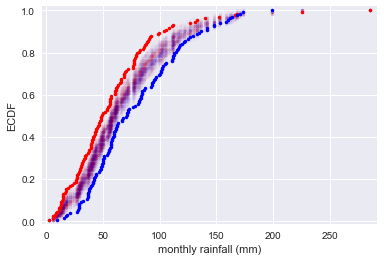

In [72]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(
                                    rain_july, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Notice 
1. the permutation samples' ECDFs overlap and give a purple haze. 
2. None of the ECDFs from the permutation samples overlap with the observed, data, suggesting that the hypothesis is not commensurate with the data. 
    - July and November rainfall are not identically distributed

## Test statistics and p-values
- after simulating the test hypothesis
- we can start to test the null hypothesis
- simulate the permutation many times (10,000) and look at histogram of the test statistic values.
    - compare it with the line that represents the test statistic of the original data
        - p-value will correspond to the area under the curve delimited by the original test statistic   

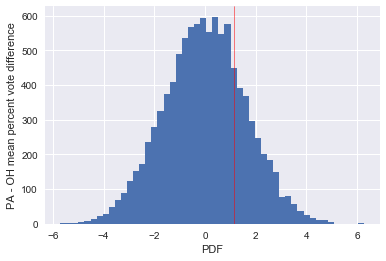

In [73]:
test_statistic = []
for i in range(10000):
    perm_sample_PA, perm_sample_OH = permutation_sample(dem_share_PA,
                                                       dem_share_OH)
    # difference of the permuted samples
    test_statistic.append(np.mean(perm_sample_PA) - np.mean(perm_sample_OH))

plt.hist(np.array(test_statistic), bins = 50)
plt.axvline(x = np.mean(dem_share_PA) - np.mean(dem_share_OH), 
            color = 'red', linewidth = .5)
plt.xlabel('PDF')
plt.ylabel('PA - OH mean percent vote difference')
plt.show()

In this case, about 23% of the "elections" had a least 1.16% difference or greater. 0.23 is the p-value

## p-value
- the probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true
    - the probability of getting at least 1.16% mean diffference 

So, is it plausible that we would observe the vote share we got if PA and OH had identically distributed county-level voting. 
- yes. 
- it happend 23% of the time under the null hypothesis

- NOT THE PROBABILITY THAT THE NULL HYPOTHESIS IS TRUE

- p-value only maningful if the null hypothesis is clearly stated, along with the tes stat used to evaluate it.
- when the p-val is small it is often said the data are statistically significantly different than what we would observe under the null hypotheis
- for this reason the hpothesis testing we're doing is sometimes called the null hypothesis significance testing, or NHST

remember: consider how different the data are from what you would expect from the null hypothesis
- statistical significance (low p-values)
- practical significance, whether or not the difference of the data from the null hypothesis matters for practical considerations, are two different things. 

statistical significance != practical significance

In [74]:
# generalize the above process into a function
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [75]:
ID = ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B']
impact_force = [1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468]

frogs_df = pd.DataFrame(ID, impact_force)
frogs_df.reset_index(inplace=True)
frogs_df.columns = ['impact_force', 'ID']
frogs_df.head()

impact_force ID
0         1.612  A
1         0.605  A
2         0.327  A
3         0.946  A
4         0.541  A

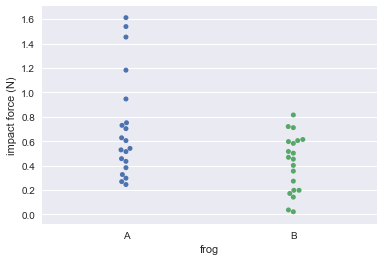

In [76]:
# swarm plot
sns.swarmplot(x = 'ID', y = 'impact_force', data = frogs_df)
plt.xlabel('frog')
plt.ylabel('impact force (N)')
plt.show()

The swarm plots look like the frogs have different data
- but since only 20 data points per frog is perhaps too little to notice the pattern, let's measure the distribution of each one

### Permutation test on frog data

In [77]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


In [78]:
force_a = frogs_df.impact_force[frogs_df.ID == 'A']
force_b = frogs_df.impact_force[frogs_df.ID == 'B']

In [79]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)
print('empirical diff of means', empirical_diff_means)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

#I'm pretty sure p will be the odds of getting a diff of means 
# of the permuted samples that is
# greater than or equal to the empirical difference

# i.e. odds of getting the empirical difference
# if two identical frogs were compared 20 * 10,000 times

# i.e. the chance that two identical frogs would produce these results
# if they were tested 200,000 times

# .4% chance

empirical diff of means 0.2882500000000002
p-value = 0.0046


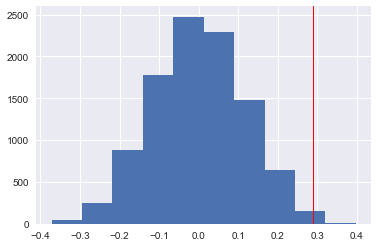

In [80]:
plt.hist(perm_replicates)
plt.axvline(x = empirical_diff_means, color = 'red', linewidth = '1')
plt.show()

## Bootstrap Hypothesis Tests
pipeline of hypothesis testing
1. clearly state the null-hypothesis
2. Define the test statistic
3. generate many sets of simulated data, under the assumption the null hypothesis is true
4. compute the corresponding test statistic many times (for each simulated data set).
5. The p-value is the fraction of your simulated data sets for whicch the test statistic is at least as extreme as it was for the real data

### Example: Michelson & Newcomb: speed of light pioneers
Michelson mean: 299,852 km/s
Newcomb mean: 299,860 km/s

difference of about 8 km/s

was there something fundamentally different about their experiments?

catch: we only have newcombs mean (and not his measurements)

**hypothesis: The true mean speed of light in Michelson's experiments was actually Newcomb's reported value**
- *sorta like saying: Michelson's data was skewed somehow, and had he actually made enough measurements or cleaned up his noise, he would have obtained Newcombs mean*
    - the mean michelson would have gotten, had he done his experiment lots and lots and lots of times
    
we can't do permutations because we don't have newcombs data.

**solution:**
### Shifting the Michelson data

In [81]:
newcomb_value = 299860 # km/s
#mean measurement from newcomb

In [84]:
# michelson's mean measurement in km/s
np.mean(michelson_speed_of_light.Speed)

299852.4

In [95]:
# shift the michelson data so its mean matches the newcomb value

In [96]:
michelson_shifted = michelson_speed_of_light.Speed - np.mean(michelson_speed_of_light.Speed) + newcomb_value
michelson_shifted.mean()

299860.0000000005

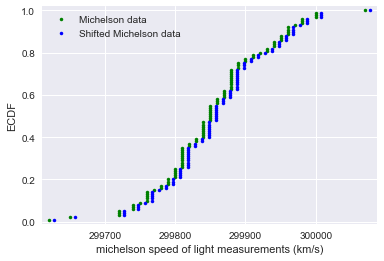

In [107]:
# Create and plot ECDFs for both original data
x_1, y_1 = ecdf(michelson_speed_of_light.Speed)
x_2, y_2 = ecdf(michelson_shifted)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='green')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('michelson speed of light measurements (km/s)')
_ = plt.ylabel('ECDF')
plt.legend(['Michelson data', 'Shifted Michelson data'])
plt.show()

I'm not getting the same results as the data camp video but whateves

## Calculating the test statistic
compute the observed test statistic

In [103]:
def diff_from_newcomb(data, newcomb_value = 299860):
    return np.mean(data) - newcomb_value

diff_obs = diff_from_newcomb(michelson_speed_of_light.Speed)

diff_obs #the observed tes statistic

-7.599999999976717

## Computing the p-value
bs_replicates will be the value of the test statistic for the bootstrap samples of data

we pass the michelson_shifted data because *those* are the ones used to simulate the null hypothesis
- that michelson would have obtained newcombs mean had he conduceted sufficient iterations. 
    - in other words, we'll look to see what the odds are that, assuming the true mean is equivalent to necombs mean, michelson could have by sheer chance obtained a difference at least as extreme as the observed one

In [123]:
bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)

In [124]:
#what percent of the observed differences are at least as extreme as our observed difference
p_value = np.sum(bs_replicates <= diff_obs) / 10000
p_value

0.1602

This suggests that it is quite possible that newcomb and michelson did not have fundamental differences in their measurements. 

This has been an example of a:
## One sample test
- Compare one set of data to a single statistic from a comparable set of data
    - compare the michelson data to the newcomb mean



### Frogs üê∏ and one-sample bootstrap hypothesis test
Another Frog (üê∏ C) was studies. 
- check if frog C and B have similar impact forces
- but, we don't have C's impact force measurements
    - we do, however, know that their mean was 0.55 N
- we cant do a permutation
    -  we cant test the hypothesis that the measurements come from the same distribution
    - but, we can test whether 
**Null Hypothesis** the mean of B is equal to the mean of C
**test statistic** mean
(Goal: calculate the probability that two frogs with equal means could be measured to have the observed difference)
1. translate all of the data from üê∏ B
    - (subtract the mean of B, and add the mean of C to every measurement in B)
        - This leaves other propoerties of Frog B's distribution, such as the variance, unchanged. 
        
perform bootstrap test of the hypothesis that Frog A and Frog B have identical distributions of impact forces using the difference of means test statistic

In [128]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0066


In [ ]:
# .66% chance of frogs with identical means being measured with such a difference

## Two sample test
- compare two sets of data

In [135]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a, force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

#0.7% chance frogs with identical distributions would be observed with at least the empirical difference

p-value = 0.0058


Compare to the p = 0.0063 that we got from the permutation test

Both tests test the same thing. However, the permutation test *exactly* simulates the null hypothesis that the data came from the same distribution, whereas the bootstrap test *aproximately* simulates it.

**np.random.choice allows for repeated values**

**np.random.permutation does not**

The bootstrap hypothesis test, while approximate, is more versatile

In [144]:
# whats the difference between
np.random.permutation(10)

array([7, 0, 3, 5, 8, 1, 6, 2, 4, 9])

In [143]:
# and
np.random.choice(10, size=10)

array([2, 3, 7, 7, 8, 0, 9, 3, 5, 6])

### A two-sample bootstrap hypothesis test for difference of means.
You performed a one-sample bootstrap hypothesis test, which is impossible to do with permutation. Testing the hypothesis that two samples have the same distribution may be done with a bootstrap test, but a permutation test is preferred because it is more accurate (exact, in fact). But therein lies the limit of a permutation test; it is not very versatile. 

*We now want to test the hypothesis that Frog A and Frog B have **the same mean impact force, but not necessarily the same distribution**. This, too, is impossible with a permutation test.*

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [151]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0041


Notice: that the 'more forgiving' hypothesis (that only the means are equal, as opposed to having identical distributions) gives a higher p-value. 

# Chp. 4 A/B testing
- Example: Comaring old Splash page to a new, redesigned, splash page
    - page A sends 45/500 users through
    - page B sends 67/500 users through
- lets test to see if this is statistically significant or due to chance

## Null hypothesis: The click-through rate is not affected by the redesign

In [182]:
# construct A
clickthrough_A = np.append(np.random.choice([1], size=(45,)), 
                           np.random.choice([0], size = (500-45,)))
clickthrough_A = np.random.permutation(clickthrough_A)
clickthrough_A.sum()

45

In [183]:
# construct B
clickthrough_B = np.append(np.random.choice([1], size=(67,)), 
                           np.random.choice([0], size = (500-67,)))
clickthrough_B = np.random.permutation(clickthrough_B)
clickthrough_B.sum()

67

In [184]:
# define a function to calculate the difference of fractions of users each page sends through
def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A

In [185]:
# compute the observed value
diff_frac_obs = diff_frac(clickthrough_A,
                         clickthrough_B)
round(100*diff_frac_obs, 2)

4.4

## Permutation test of clicks through

In [186]:
# initialize empty set of replicate test statistics
perm_replicates = draw_perm_reps(clickthrough_A, 
                                 clickthrough_B, 
                                 diff_frac, 
                                size = 10000)

In [187]:
# p value: the fractio of test statistics that is at least as extreme as the observed one
p_value = np.sum(perm_replicates >= diff_frac_obs) / 10000
p_value

0.0166

relatively small p value. So we might reasonably think the re-design is an imporvement

## A/B Test
- Used by organizations to see if a strategy change gives a better result
### Null Hypothesis of an A/B test
- The test statistic is impervious to the change
- low p-value suggests a change in strategy led to a change in performance

- ‚ö†Ô∏è the difference in p_value may not have been worth the cost. 
    - may not have been practically significantly

### The vote for the Civil Rights Act in 1964
- Excluding "present" and "abstain" votes, 
    - 153 House Democrats voted yay
        - 91 Democrats voted nay
    - 136 House Republicans voted yay
        - 35 Republicans voted nay
Question: Did party affiliation make a difference in the vote?

To Answer the question, let's test the null-hypothesis
**null-hypothesis**: party had no bearing on a representative's vote

**test statistic** fraction of Democrats voting in favor

**evaluate** the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. To do this:
- permute the party labels of party labels of the House voters 
- and then arbitrarily divide them into "Democrats" and "Republicans"

*Wait, what?* 
1) Assume party made no difference, that is, assume the distribution of nays is arbitrary. 
2) reshuffle the votes and slice them up in appropriate slices, measure the fraction of Dems voting nay. 
3) Do this 10000 times to see what the odds are that the dems could have "drawn that fraction of nays" if the nays were distributed at random...

*I guess, that does actually make sense*

In [190]:
# Construct arrays of data:
dems = np.array([True] * 153 + [False] * 91)

reps = np.array([True] * 136 + [False] * 35)

def frac_yay_dems(dems, reps):
    '''Compute fraction of Democrat yay cotes.'''
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples
perm_replicates = draw_perm_reps(dems, reps, frac_yay_dems, 10000)

# Compute and print p-value
p = np.sum(perm_replicates <= 153/244)/len(perm_replicates)
print('p-value = ', p)
# .01 % chance of dems randomly drawing 91 nays from a shuffled deck

p-value =  0.0003


"Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias"

### Continuous variable A/B test
evaluate the time between no hitters before and after changes to 
dead-ball regulations (whether or not a pitcher can spit on or scuff a ball).

In [192]:
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [194]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs)/len(perm_replicates)
print('p-val =',p)


p-val = 0.0001


Small p value indicates that, assuming the regulation had no effect, there is a 1 in 10,000 chance that the before and after values could have been drawn that way from a "randomly shuffled deck."

**Notice: computed p values of 0 likely just p value is smaller than your resolution**

### Test of Correlation
**2008 US swing state election results**
- using pearson correlation coefficient as test statistic
    - formerly we obtained a ro = 0.54
    - not perfectly correlated, but correlated none the less
    
**Hypothesis test of correlation**
- Posit nul hypothesis: the two variables are completely uncorrelated
- Simulate data assuming null hpothesis is true
- Use Pearson correlation, ro as a test statistic
- Compute p-values as fractions of replicates that have ro as high as the observed value

If you're assuming x has no correlation to y, then leave the y values where they are, but randomly permute the x values, then compute the permuted_replicates. 
- this is like shuffling and drawing the x values 10,000 times and checking how often the shuffled x values happen to produce a ro at least as extreme as the observed ro

### Ex: Hypothesis test on Pearson correlation of illiteracy and fertility


In [195]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


a p-value of 0 means we didn't get a single result out of 10,000 simulations that met the observed value. That suggests the results are statistically significant. 

### Ex: Neonicotinoid insecticides and male bee fertility üêù 
check to see if neonicotinoid incecticides are reducing the count of live sperm in a half ml of bee sperm

In [196]:
control = np.array([ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174,
        6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148,
        6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      ,
        4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   ,
        6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158,
        6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172,
        3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 ,
        3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892,
        4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     ,
        0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 ,
        0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668,
        2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 ,
        2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294,
        2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478,
        3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232,
        8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282,
        3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958,
        6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628,
        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,
        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,
        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,
        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,
        3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666,
        0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      ,
        0.065   ])
treated = np.array([1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966,
       3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538,
       2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836,
       2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354,
       3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 ,
       2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658,
       0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964,
       2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 ,
       4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602,
       2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 ,
       1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804,
       3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046,
       2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962,
       2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      ,
       3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696])

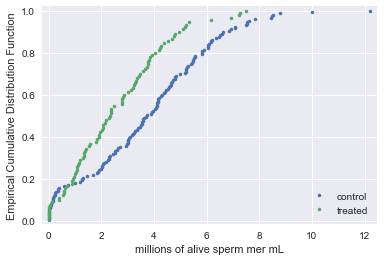

In [197]:
# Start with some EDA

# Compute the x,y values for ECDFS
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# plot the ECDFS
plt.plot(x_control, y_control, marker = '.', linestyle = 'none')
plt.plot(x_treated, y_treated, marker = '.', linestyle = 'none')

# set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc = 'lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm mer mL')
plt.ylabel('Empirical Cumulative Distribution Function')
plt.show()

the plot shows a clear difference with treated bees having lower sperm counts. Let's test the hypothesis now.

### Bootstrap hypothesis test on bee sperm counts
**hypothesis** On average, male bees treated with neonicotinoid insecticide have the same bumber of active sperm per mililiter of semen than do untreated male bees. 
**test statistic** difference of means

In [198]:
# compute the difference in mean sperm count:
diff_means = diff_of_means(control, treated)

# compute mean of pooled data:
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted, np.mean, size = 10000)
bs_reps_traeted = draw_bs_reps(treated_shifted, np.mean, size = 10000)

# Get replicates of difference of means:
bs_replicates = bs_reps_control - bs_reps_control - bs_reps_traeted

# Compute and print p-value
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated))/len(bs_replicates)
print('p-value ', p)

p-value  0.0
